# *Content Based Recommender System using the algorithm --> Cosine-Similarity*

**Importing essential libraries **

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS
import nltk

In [ ]:
from google.colab import files
uploaded_file = files.upload()

**Raw Data**

In [ ]:
data = pd.read_csv("movies2.csv")
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
# getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# Counts null values over all features
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
# for Cross-Checking no. of null values with the above cell
print(data["color"].isnull().sum())
print(data["director_name"].isnull().sum())
print(data["movie_facebook_likes"].isnull().sum())
print(data["gross"].isnull().sum())

19
104
0
884


**Removing all NaN values** 

In [ ]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


**Check after removing Null values**

In [ ]:
# Counts null values over all features
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


 **features**

In [ ]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**Putting Genres for each movie as a list**

In [ ]:
data['genres'] = data['genres'].apply(lambda x:x.split('|'))

<ipython-input-166-b25ee78f1f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].apply(lambda x:x.split('|'))


In [ ]:
data['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

**Visualizing the Genres available (called Word Cloud)**

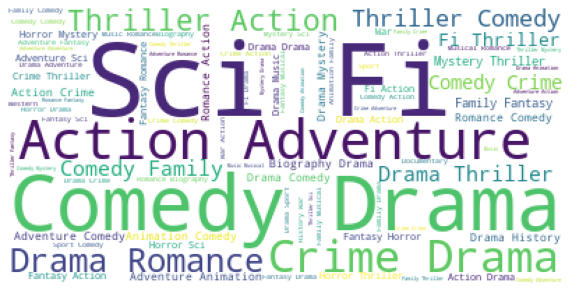

In [ ]:
l = []

for i in data['genres']:
  for j in i:
    l.append(j)

wc = WordCloud(stopwords = STOPWORDS, background_color='white', max_words=100).generate(" ".join(l))
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

**Removing Spaces between the Names (directors, actors, .....)**

In [ ]:
data['director_name'] = data['director_name'].apply(lambda x:x.split())
data['director_name'] = data['director_name'].apply(lambda x:"".join(x))

data['actor_1_name'] = data['actor_1_name'].apply(lambda x:x.split())
data['actor_1_name'] = data['actor_1_name'].apply(lambda x:"".join(x))

data['actor_2_name'] = data['actor_2_name'].apply(lambda x:x.split())
data['actor_2_name'] = data['actor_2_name'].apply(lambda x:"".join(x))

data['actor_3_name'] = data['actor_3_name'].apply(lambda x:x.split())
data['actor_3_name'] = data['actor_3_name'].apply(lambda x:"".join(x))

<ipython-input-169-d9cd674fd96c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['director_name'] = data['director_name'].apply(lambda x:x.split())
<ipython-input-169-d9cd674fd96c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['director_name'] = data['director_name'].apply(lambda x:"".join(x))
<ipython-input-169-d9cd674fd96c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

**Merging Director and Actors name into one list under Cast column**



In [ ]:
data['cast'] = list(data['director_name'] + ', ' + data['actor_1_name'] + ', ' + data['actor_2_name'] + ', ' + data['actor_3_name'])

<ipython-input-170-6af5c44f08e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cast'] = list(data['director_name'] + ', ' + data['actor_1_name'] + ', ' + data['actor_2_name'] + ', ' + data['actor_3_name'])


In [ ]:
data['cast'] = data['cast'].apply(lambda x:x.split(', '))

<ipython-input-171-0fdaf17f5084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cast'] = data['cast'].apply(lambda x:x.split(', '))


**Putting Movie Description into a List**

In [ ]:
data['plot_keywords'] = data['plot_keywords'].apply(lambda x:x.split('|'))

<ipython-input-172-50a773c76561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plot_keywords'] = data['plot_keywords'].apply(lambda x:x.split('|'))


In [ ]:
data['plot_keywords'][0]

['avatar', 'future', 'marine', 'native', 'paraplegic']

**Creating a column Tags from merging 3 columns**

In [ ]:
data['tags'] = data['plot_keywords'] + data['genres'] + data['cast']

<ipython-input-174-8fd55426ecf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['plot_keywords'] + data['genres'] + data['cast']


**Converting lists inside Tags into strings**

In [ ]:
data['tags'] = data['tags'].apply(lambda x:" ".join(x))
data['tags'] = data['tags'].apply(lambda x:x.lower())

<ipython-input-175-99e23443e8f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(lambda x:" ".join(x))
<ipython-input-175-99e23443e8f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(lambda x:x.lower())


**Creating Unique IDs for all movies**

In [ ]:
l = []

while len(l) < len(data):
  x = random.randint(1, 4000)
  if x not in l:
    l.append(x)

data['id'] = l

<ipython-input-176-d6caf13674fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = l


In [ ]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cast,tags,id
0,Color,JamesCameron,723.0,178.0,0.0,855.0,JoelDavidMoore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[JamesCameron, CCHPounder, JoelDavidMoore, Wes...",avatar future marine native paraplegic action ...,3843
1,Color,GoreVerbinski,302.0,169.0,563.0,1000.0,OrlandoBloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[GoreVerbinski, JohnnyDepp, OrlandoBloom, Jack...",goddess marriage ceremony marriage proposal pi...,1736
2,Color,SamMendes,602.0,148.0,0.0,161.0,RoryKinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[SamMendes, ChristophWaltz, RoryKinnear, Steph...",bomb espionage sequel spy terrorist action adv...,377
3,Color,ChristopherNolan,813.0,164.0,22000.0,23000.0,ChristianBale,27000.0,448130642.0,"[Action, Thriller]",...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[ChristopherNolan, TomHardy, ChristianBale, Jo...",deception imprisonment lawlessness police offi...,1738
5,Color,AndrewStanton,462.0,132.0,475.0,530.0,SamanthaMorton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,"[AndrewStanton, DarylSabara, SamanthaMorton, P...",alien american civil war male nipple mars prin...,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,OlivierAssayas,81.0,110.0,107.0,45.0,BéatriceDalle,576.0,136007.0,"[Drama, Music, Romance]",...,R,4500.0,2004.0,133.0,6.9,2.35,171,"[OlivierAssayas, MaggieCheung, BéatriceDalle, ...",jail junkie money motel singer drama music rom...,1718
5027,Color,JafarPanahi,64.0,90.0,397.0,0.0,NargessMamizadeh,5.0,673780.0,[Drama],...,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,"[JafarPanahi, FereshtehSadreOrafaiy, NargessMa...",abortion bus hospital prison prostitution dram...,2139
5033,Color,ShaneCarruth,143.0,77.0,291.0,8.0,DavidSullivan,291.0,424760.0,"[Drama, Sci-Fi, Thriller]",...,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,"[ShaneCarruth, ShaneCarruth, DavidSullivan, Ca...",changing the future independent film invention...,1781
5035,Color,RobertRodriguez,56.0,81.0,0.0,6.0,PeterMarquardt,121.0,2040920.0,"[Action, Crime, Drama, Romance, Thriller]",...,R,7000.0,1992.0,20.0,6.9,1.37,0,"[RobertRodriguez, CarlosGallardo, PeterMarquar...",assassin death guitar gun mariachi action crim...,3660


**Creating New DataFrame**

In [ ]:
new_data = data[['id', 'movie_title', 'tags']]

In [ ]:
new_data.head()

,id,movie_title,tags
0,3843,Avatar,avatar future marine native paraplegic action ...
1,1736,Pirates of the Caribbean: At World's End,goddess marriage ceremony marriage proposal pi...
2,377,Spectre,bomb espionage sequel spy terrorist action adv...
3,1738,The Dark Knight Rises,deception imprisonment lawlessness police offi...
5,884,John Carter,alien american civil war male nipple mars prin...


**Reduce the duplicacy of words in description of each movie**

In [ ]:
stemmer = PorterStemmer()
def stemtext(text):
  list = []
  for i in text.split():
    if i not in l:
      list.append(stemmer.stem(i))

  return " ".join(list)

In [ ]:
new_data['tags'] = new_data['tags'].apply(stemtext)

<ipython-input-181-2b9f3dabba47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(stemtext)


Resetting all indices

In [ ]:
new_data = new_data.reset_index(drop=True)

In [ ]:
new_data

,id,movie_title,tags
0,3843,Avatar,avatar futur marin nativ parapleg action adven...
1,1736,Pirates of the Caribbean: At World's End,goddess marriag ceremoni marriag propos pirat ...
2,377,Spectre,bomb espionag sequel spi terrorist action adve...
3,1738,The Dark Knight Rises,decept imprison lawless polic offic terrorist ...
4,884,John Carter,alien american civil war male nippl mar prince...
...,...,...,...
3751,1718,Clean,jail junki money motel singer drama music roma...
3752,2139,The Circle,abort bu hospit prison prostitut drama jafarpa...
3753,1781,Primer,chang the futur independ film invent nonlinear...
3754,3660,El Mariachi,assassin death guitar gun mariachi action crim...


**Obtaining 4000 unique words out of all tags**

**and converting each movie into a vector(4000 x 1) of unique words (how many times each word appear in the description of the movie)**

In [ ]:
vectorize = CountVectorizer(max_features=4000, stop_words='english')
vectors = vectorize.fit_transform(new_data['tags']).toarray()

In [ ]:
len(vectorize.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4000

In [ ]:
vectorize.get_feature_names()

['11',
 '12',
 '13',
 '16th',
 '17th',
 '1800',
 '18th',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '19th',
 '2000',
 '2001',
 '2010',
 '21st',
 '50cent',
 'aaronstanford',
 'aaronyoo',
 'aasifmandvi',
 'abandon',
 'abbiecornish',
 'abduct',
 'abigailspenc',
 'aborigin',
 'abort',
 'abram',
 'abus',
 'accid',
 'acclaim',
 'account',
 'accus',
 'act',
 'action',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adamarkin',
 'adambaldwin',
 'adamgarcia',
 'adamgoldberg',
 'adammckay',
 'adamsandl',
 'adamscott',
 'adamshankman',
 'adapt',
 'addict',
 'admir',
 'adopt',
 'adrianlyn',
 'adrianmartinez',
 'adult',
 'adulter',
 'adulteri',
 'adventur',
 'advertis',
 'advic',
 'affair',
 'afghanistan',
 'africa',
 'african',
 'afterlif',
 'age',
 'agenc',
 'agent',
 'agnesbruckn',
 'aidanquinn',
 'aidanturn',
 'aimeegarcia',
 'air',
 'airplan',
 'airport',
 'ajmichalka',
 'alabama',
 'alannaubach',
 'alanpark',
 'alanrickman',
 'alanruck',
 'alantaylor',
 'a

**Finally, implementing the Cosine-Similarity function** (Final step in the project) 

Similarity Matrix

In [ ]:
similarity_mat = cosine_similarity(vectors)

In [ ]:
new_data['movie_title'][1]

"Pirates of the Caribbean: At World's End"

In [ ]:
for x in range(len(new_data['movie_title'])):
  new_data['movie_title'][x] = new_data['movie_title'][x][:-1]

<ipython-input-191-fa91d940fda0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['movie_title'][x] = new_data['movie_title'][x][:-1]


In [ ]:
def recommend(movie):
  movie_index = new_data[new_data['movie_title']==movie].index[0]
  movie_vector_list = similarity_mat[movie_index]
  similar_movie_list = sorted(list(enumerate(movie_vector_list)), reverse = True, key = lambda x:x[1])[1:11]

  for x in similar_movie_list:
    print(new_data.iloc[x[0]].movie_title)

In [ ]:
recommend('The Dark Knight Rises')

Premium Rush
Inception
The Devil's Own
Deadfall
The One
Die Hard 2
Lethal Weapon 3
Live Free or Die Hard
Triple 9
Under Siege 2: Dark Territory
